Домашнее задание: 
задание для самостоятельной реализации по cross validation (nested k -fold)
сформулировать и решить задачу классификации на случайных данных при помощи SVC,
тренировку проводить и измерять качество модели c помощью nested k-folds
визуализировать ошибку и результаты предсказания

Средняя точность модели: 0.32 ± 0.03
              precision    recall  f1-score   support

           0       0.30      0.27      0.28       168
           1       0.33      0.56      0.42       174
           2       0.33      0.11      0.16       158

    accuracy                           0.32       500
   macro avg       0.32      0.31      0.29       500
weighted avg       0.32      0.32      0.29       500



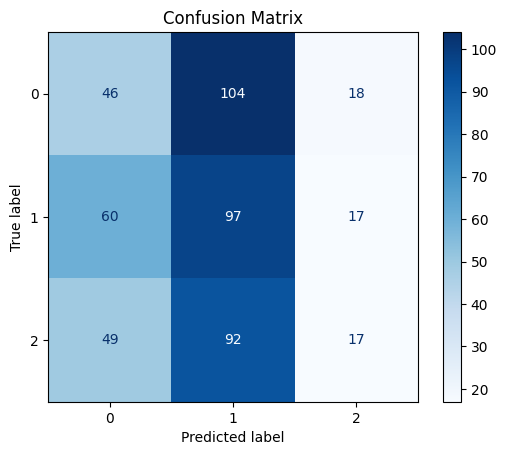

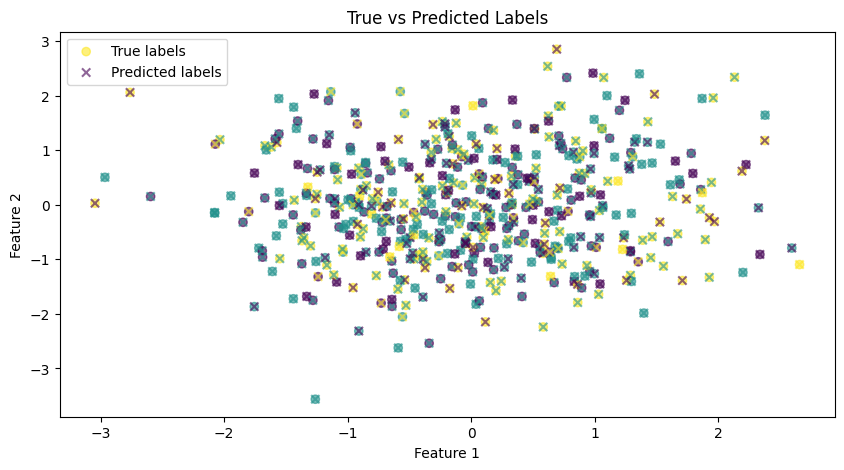

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Параметры данных
mu, sigma = 0, 1  # Среднее и стандартное отклонение
N_total, features_num = 500, 2  # Количество выборок и признаков
n_classes = 3  # Количество классов

# Генерация данных
X = np.random.normal(mu, sigma, N_total * features_num).reshape((N_total, features_num))
y = np.random.randint(0, n_classes, size=N_total)

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Вложенные k-folds
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Параметры для подбора
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Метрики
test_scores = []
predictions = []
true_labels = []

for train_idx, test_idx in outer_cv.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Подбор гиперпараметров
    model = GridSearchCV(SVC(), param_grid, cv=inner_cv, scoring='accuracy')
    model.fit(X_train, y_train)
    
    # Оценка на тестовых данных
    best_model = model.best_estimator_
    test_score = best_model.score(X_test, y_test)
    test_scores.append(test_score)
    
    # Сохранение предсказаний для визуализации
    predictions.extend(best_model.predict(X_test))
    true_labels.extend(y_test)

# Вывод метрик
print(f"Средняя точность модели: {np.mean(test_scores):.2f} ± {np.std(test_scores):.2f}")
print(classification_report(true_labels, predictions))

# Визуализация результатов
conf_matrix = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(n_classes))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# График реальных и предсказанных значений
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, marker='o', label='True labels', alpha=0.6)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=predictions, marker='x', label='Predicted labels', alpha=0.6)
plt.legend()
plt.title('True vs Predicted Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
